In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import pandas as pd
DATA=pd.read_csv(r"cat.csv")
DATA

LONGITUDE  LATITUDE  YEAR  MONTH  DAY  MAGNITUDE   DEPTH  HOUR  MINUTE
0       94.4715   22.7996  2023      7   24       4.40  96.712    20      14
1       94.9710   25.1395  2023      7   21       4.00  87.809    20       5
2       91.3553   25.7210  2023      7   16       4.30  10.000    14      23
3       95.4345   25.0831  2023      7   12       4.30   9.904    12      26
4       94.0927   23.1582  2023      7   11       4.30  77.822    14       6
...         ...       ...   ...    ...  ...        ...     ...   ...     ...
2013    96.3890   25.2640  1971      5   30       6.18  15.000    15      44
2014    96.3010   25.2500  1971      5   30       5.28  10.000    11      55
2015    96.6870   26.0860  1971      3   31       5.28  15.000     8      16
2016    91.5910   23.7380  1971      2    2       5.40  45.300     7      59
2017    91.6590   24.9000  1970      8   28       5.30  27.500     1      24

[2018 rows x 9 columns]

([1.5,
  1.6,
  1.7,
  1.8,
  1.9,
  2.0,
  2.1,
  2.2,
  2.3,
  2.4,
  2.5,
  2.6,
  2.7,
  2.8,
  2.9,
  3.0,
  3.1,
  3.2,
  3.3,
  3.4,
  3.5,
  3.6,
  3.7,
  3.8,
  3.9,
  4.0,
  4.1,
  4.2,
  4.3,
  4.4,
  4.5,
  4.6,
  4.7,
  4.8,
  4.9,
  5.0,
  5.1,
  5.2,
  5.3,
  5.4,
  5.5,
  5.6,
  5.7,
  5.8,
  5.9,
  6.0,
  6.1],
 [0.14282290478856627,
  0.14767952146511235,
  0.15287805827107084,
  0.1584559409243023,
  0.16437028740274032,
  0.1708360309658501,
  0.1778312822784816,
  0.1854238640119088,
  0.19369369829947555,
  0.20273563084808935,
  0.21266308478753554,
  0.22361284331281392,
  0.23575139004543186,
  0.2492834330011151,
  0.2644635429586378,
  0.28161231987335333,
  0.3011392851540515,
  0.32357600762943317,
  0.3494385305668368,
  0.3800149909063107,
  0.41600727274160293,
  0.458334579970323,
  0.5093332521621126,
  0.5699834571310335,
  0.6401902587213364,
  0.72945700916305,
  0.8148276357186958,
  0.9205999278851089,
  1.0185933178866464,
  1.0967221254521322,
 

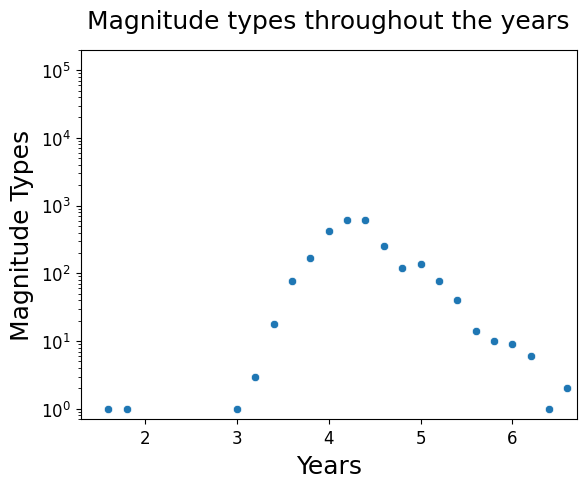

In [4]:
import math
from math import sqrt
binning=0.1
Mmin=3.0
Mc=1.6
list_bin=[]
list_b=[]
list_sigma1=[]
list_sigma2=[]
for k in range(15,62,1):
    M_cutoff=k/10 #use this
    #evaluation of maximum likelihood B^
    magnitude=DATA[DATA['MAGNITUDE']>=M_cutoff].loc[:,'MAGNITUDE']
    mean_magn=np.mean(magnitude)
    b1=math.log10(math.exp(1))/(mean_magn-(M_cutoff-binning/2))
    sigma1=b1/sqrt(len(magnitude))
    ## standard error (Aki and Shi & Bolt)
    scarto_list=[]
    for j in magnitude:
        scarto=(j-mean_magn)**2
        scarto_list.append(scarto)
    sum_scarto_list=sum(scarto_list)
    sigma2=2.30*b1**2*sqrt(sum_scarto_list/(len(magnitude)*(len(magnitude)-1)))
    list_bin.append(M_cutoff)
    list_b.append(b1)
    list_sigma1.append(sigma1)
    list_sigma2.append(sigma2)
#plot Gutemberg-Richter (0.2 binning)
b=1.21
magnitude=DATA['MAGNITUDE']
list_1=pd.Series([1 for i in range(181777)],name='1' )
#bin_magnitude=pd.Series(np.array(np.arange(np.min(magnitude),np.max(magnitude)+0.1,0.2)))
bin_magnitude=pd.Series(np.array(np.arange(np.min(magnitude),np.max(magnitude)+0.2,0.2)))
number_of_earthquakes= pd.Series(np.array([np.count_nonzero((magnitude >= i ) & (magnitude <= i+0.2))
                                           for i in bin_magnitude]))
#bin_magnitude=np.add(bin_magnitude,0.2)
df1=pd.concat([bin_magnitude,number_of_earthquakes],axis=1)
df1.columns=['bin_magnitude','number_of_earthquakes']

plot=sns.scatterplot(x='bin_magnitude',y='number_of_earthquakes',data=df1)
plt.xlabel("Years",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel("Magnitude Types",fontsize=18,labelpad=5)
plt.tick_params(labelsize=12)
plt.title('Magnitude types throughout the years',fontsize=18,pad=15.5)

plt.yscale('log')# an alternative:  plot.set(yscale="log")
plt.ylim((0.7, 200000)) # DO NOT put 0 or negative values 'cause there is a log scale
plt.xlim((1.3, 6.7))
#explain influence of old catalogues
#fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\N.earthquakes_bin_magnitude.png",dpi=600)
list_bin,list_b,list_sigma1,list_sigma2


In [15]:
old=[0,1,2,3]
new=['Magnitude','B_value',r'$\sigma_{st-error}$ Aki', r'$\sigma_{st-error}$ Shi & Bolt ']
table_errors_b_value_magnitude=pd.DataFrame([list_bin,list_b,list_sigma1,list_sigma2]).T
table_errors_b_value_magnitude.rename(columns=dict(zip(old,new)),inplace=True)
table_errors_b_value_magnitude

Magnitude   B_value  $\sigma_{st-error}$ Aki  \
0         1.5  0.142823                 0.003235   
1         1.6  0.147680                 0.003345   
2         1.7  0.152878                 0.003463   
3         1.8  0.158456                 0.003589   
4         1.9  0.164370                 0.003724   
5         2.0  0.170836                 0.003871   
6         2.1  0.177831                 0.004029   
7         2.2  0.185424                 0.004201   
8         2.3  0.193694                 0.004389   
9         2.4  0.202736                 0.004593   
10        2.5  0.212663                 0.004818   
11        2.6  0.223613                 0.005066   
12        2.7  0.235751                 0.005341   
13        2.8  0.249283                 0.005648   
14        2.9  0.264464                 0.005992   
15        3.0  0.281612                 0.006381   
16        3.1  0.301139                 0.006823   
17        3.2  0.323576                 0.007331   
18        3.3  0.349439                 0.007919   
19        3.4  0.380015                 0.008612   
20        3.5  0.416007                 0.009433   
21        3.6  0.458335                 0.010411   
22        3.7  0.509333                 0.011603   
23        3.8  0.569983                 0.013059   
24        3.9  0.640190                 0.014836   
25        4.0  0.729457                 0.017132   
26        4.1  0.814828                 0.019786   
27        4.2  0.920600                 0.023234   
28        4.3  1.018593                 0.027321   
29        4.4  1.096722                 0.032022   
30        4.5  1.170585                 0.037702   
31        4.6  1.214105                 0.044069   
32        4.7  1.197616                 0.050340   
33        4.8  1.166470                 0.056986   
34        4.9  1.126150                 0.063961   
35        5.0  1.132327                 0.073091   
36        5.1  1.162630                 0.084569   
37        5.2  1.132942                 0.095411   
38        5.3  1.026873                 0.103205   
39        5.4  1.025892                 0.116159   
40        5.5  1.072332                 0.134042   
41        5.6  1.098117                 0.153767   
42        5.7  1.049821                 0.170303   
43        5.8  0.982249                 0.185628   
44        5.9  1.065753                 0.217546   
45        6.0  1.017878                 0.239916   
46        6.1  1.000020                 0.267267   

    $\sigma_{st-error}$ Shi & Bolt   
0                          0.000475  
1                          0.000508  
2                          0.000544  
3                          0.000584  
4                          0.000623  
5                          0.000673  
6                          0.000729  
7                          0.000793  
8                          0.000865  
9                          0.000948  
10                         0.001043  
11                         0.001153  
12                         0.001282  
13                         0.001433  
14                         0.001613  
15                         0.001829  
16                         0.002092  
17                         0.002415  
18                         0.002812  
19                         0.003325  
20                         0.003976  
21                         0.004799  
22                         0.005888  
23                         0.007310  
24                         0.009127  
25                         0.011792  
26                         0.014738  
27                         0.019080  
28                         0.024279  
29                         0.030163  
30                         0.037721  
31                         0.046052  
32                         0.052711  
33                         0.058994  
34                         0.064566  
35                         0.074641  
36                         0.089644  
37                         0.100437  
38                       

In [16]:
#a=DATA[(DATA['Magnitude']>=3.0)  & (DATA['Magnitude']<3.1)].loc[:,'Magnitude']
#print(a)
#DATA['Magnitude']
bin_magnitude

0     0.0
1     0.2
2     0.4
3     0.6
4     0.8
5     1.0
6     1.2
7     1.4
8     1.6
9     1.8
10    2.0
11    2.2
12    2.4
13    2.6
14    2.8
15    3.0
16    3.2
17    3.4
18    3.6
19    3.8
20    4.0
21    4.2
22    4.4
23    4.6
24    4.8
25    5.0
26    5.2
27    5.4
28    5.6
29    5.8
30    6.0
31    6.2
32    6.4
33    6.6
34    6.8
35    7.0
36    7.2
37    7.4
dtype: float64

[]

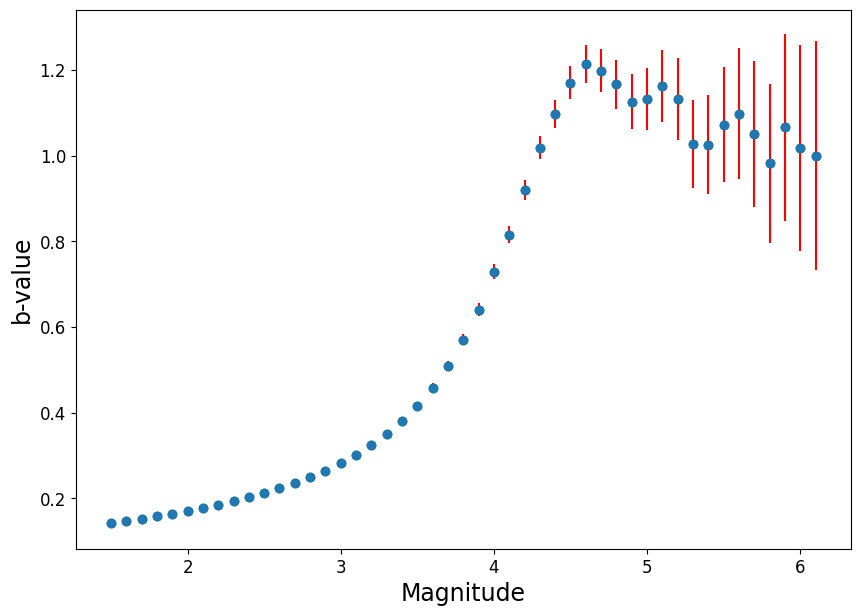

In [17]:
#PLOT B-VALUE BY MAGNITUDE CUT-OFF
fig=plt.figure(figsize=(10,7))

plt.scatter(list_bin,list_b,c='g',)
plt.errorbar(list_bin,list_b, yerr=list_sigma1,fmt='o',ecolor='r')
plt.xlabel('Magnitude',fontsize=17)
plt.ylabel('b-value',fontsize=17)
plt.tick_params(labelsize=12)
plt.plot()
#plt.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\b_value_error_bar.png",dpi=600)


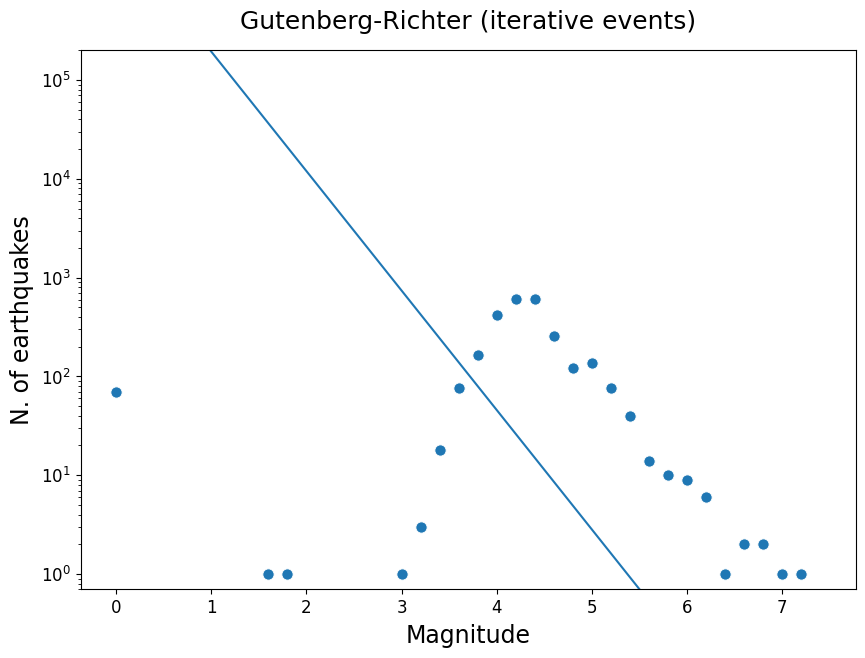

In [18]:
#PLOT GUTENBERG-RICHTER (ITERATIVE)
a_value=6.5
b=1.21
#b=math.log(1/((np.mean(magnitude)-(Mmin-binning/2))*(math.log(10))))# according to 'a non robust method to estimate the b value'
#b=math.log10(math.exp(1)/(np.mean(magnitude)-(Mmin-binning/2)))
Gutemberg_Richter=np.power(10,a_value-b*bin_magnitude) #here you can consider b or not
plt.figure(figsize=(10,7))
plot=sns.scatterplot(x='bin_magnitude',y='number_of_earthquakes',data=df1,s=66)
plt.title('Gutenberg-Richter (iterative events)',fontsize=18,pad=15.5)
plt.yscale('log')# an alternative:  plot.set(yscale="log")
plt.ylim((0.7, 200000)) # DO NOT put 0 or negative values 'cause there is a log scale
plt.plot(bin_magnitude,Gutemberg_Richter)
plt.xlabel('Magnitude',fontsize=17,labelpad=5) #set font and title of x label
plt.ylabel('N. of earthquakes',fontsize=17,labelpad=5) #set font and title of y label
plt.tick_params(labelsize=12)
#plt.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\gut_Richter.png",dpi=600)